In [1]:
import cv2
import numpy as np
from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_mse as mse
%matplotlib inline
import matplotlib.pyplot as plt
import face_recognition as fr

# IMPORT PRE-TRAIN MODEL FOR FACE RECOGNITION

In [2]:
face_cascade = cv2.CascadeClassifier('pre_train_model/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('pre_train_model/haarcascade_eye.xml')

# IMPORT IMAGE AND CONVERT TO GRAY SCALE IMAGE

In [3]:
cmnd = cv2.imread('image/Data/CMND/tung_cmnd.jpg')
self = cv2.imread('image/Data/Shelphie/tung_shelphie.jpg')
try:
    gray_cmnd = cv2.cvtColor(cmnd, cv2.COLOR_BGR2GRAY)
    gray_self = cv2.cvtColor(self, cv2.COLOR_BGR2GRAY)
except:
    print('May be you given wrong path! Check it agian!')

# DETECT AND CUTTING FACE FROM IMAGE


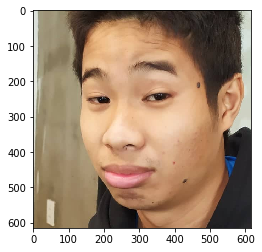

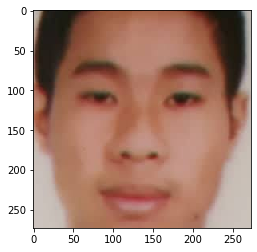

In [4]:
try:
    faces_cmnd = face_cascade.detectMultiScale(gray_cmnd, 1.5, 5)
    faces_self = face_cascade.detectMultiScale(gray_self, 1.5, 5)
    try:
        x_cmnd,y_cmnd,w_cmnd,h_cmnd = faces_cmnd[0]
        face_cmnd = cmnd[y_cmnd:y_cmnd+h_cmnd, x_cmnd:x_cmnd+w_cmnd]
        face_cmnd=cv2.cvtColor(face_cmnd,cv2.COLOR_BGR2RGB)
    except:
        print('We do not find out any face in your identification! Please try again')

    try:
        x_self,y_self,w_self,h_self = faces_self[0]
        face_self = self[y_self:y_self+h_self, x_self:x_self+w_self]
        face_self=cv2.cvtColor(face_self,cv2.COLOR_BGR2RGB)
    except:
        print('We do not find out any face in your selfie! Please try again')
    show =[]

    show.append(face_self)
    show.append(face_cmnd)
    for i in show:
        plt.imshow(i)
        plt.show()
except:
    print('Somethings went wrong! Please try again later')

# COMPARE FACE

acuracy = 67.32458210928915 
distance = 0.32675417890710845


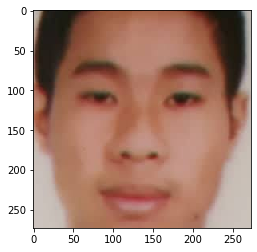

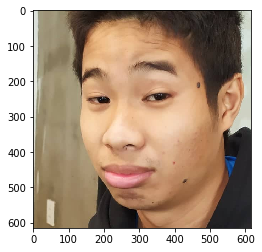

In [5]:
try:
    if (face_cmnd.shape == face_self.shape):
        difference = cv2.subtract(face_cmnd, face_self)
        b, g, r = cv2.split(difference)
        if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
            print('Somethings wrong here, two faces you give are exactly the same! Try again!')
        else:
            cmnd_encoded = fr.face_encodings(face_cmnd,num_jitters=100)[0]
            self_encoded = fr.face_encodings(face_self,num_jitters=100)[0]
            match = fr.compare_faces([cmnd_encoded],self_encoded)[0]
            distance = fr.face_distance([cmnd_encoded],self_encoded)[0]
    else:
        w = min(face_cmnd.shape[0], face_self.shape[0])
        h = min(face_cmnd.shape[1], face_self.shape[1])
        dim = (w,h)
        face_cmnd_resize = cv2.resize(face_cmnd,dim)
        face_self_resize = cv2.resize(face_self,dim)
    #     face_cmnd_resize = ((np.log(face_cmnd_resize+1)/(np.log(1+np.max(face_cmnd_resize))))*255).astype('uint8')
    #     face_self_resize = ((np.log(face_self_resize+1)/(np.log(1+np.max(face_self_resize))))*255).astype('uint8')
        cmnd_encoded = fr.face_encodings(face_cmnd_resize,num_jitters=100)[0]
        self_encoded = fr.face_encodings(face_self_resize,num_jitters=100)[0]
        match = fr.compare_faces([cmnd_encoded],self_encoded)[0]
        distance = fr.face_distance([cmnd_encoded],self_encoded)[0]
        print('acuracy =',(1-distance)*100,'\ndistance =',distance)
    show = []
    show.append(face_cmnd)
    show.append(face_self)
    for i in show:
        plt.imshow(i)
        plt.show()
except:
    print('Somethings wrong here, two faces you give are exactly the same! Try again!')
